In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
#Load the train and test dataset in padas dataframe
train = pd.read_csv("C:\\Users\\CRISTIAN\\Desktop\\Machine learning con Scikit-Learning\\Regressions\\train.csv")
test = pd.read_csv("C:\\Users\\CRISTIAN\\Desktop\\Machine learning con Scikit-Learning\\Regressions\\test.csv")

In [4]:
train.shape

(891, 12)

In [5]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
def age_aprox(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [17]:
train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [20]:
train['Age'] = train[['Age','Pclass']].apply(age_aprox, axis=1)

In [21]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [23]:
train.dropna(inplace=True)
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [32]:
df_train_dummied = pd.get_dummies(train,columns=['Sex'])

In [33]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=['Embarked'])

In [34]:
df_train_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


<AxesSubplot:>

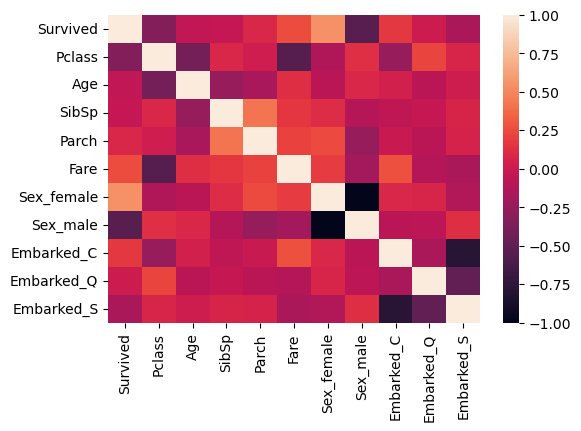

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [36]:
used_features = ['Pclass','Age','SibSp','Parch','Sex_female','Sex_male',
                'Embarked_C','Embarked_Q','Embarked_S']
X = df_train_dummied[used_features]
y = df_train_dummied['Survived']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [60]:
LogReg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [61]:
y_pred = LogReg.predict(X_test)

In [62]:
confusion_matrix(y_test,y_pred)

array([[138,  29],
       [ 25,  75]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [64]:
LogReg.coef_

array([[-1.19407106, -0.04963572, -0.40713744, -0.01181591,  1.33719631,
        -1.33782411,  0.33695837, -0.08843717, -0.249149  ]])

In [65]:
LogReg.intercept_

array([4.34930673])

In [66]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [67]:
LogReg.predict_proba(X_test)

array([[0.90111538, 0.09888462],
       [0.04238653, 0.95761347],
       [0.20763988, 0.79236012],
       [0.75303778, 0.24696222],
       [0.03468295, 0.96531705],
       [0.89660362, 0.10339638],
       [0.70405887, 0.29594113],
       [0.86555662, 0.13444338],
       [0.07765495, 0.92234505],
       [0.03421362, 0.96578638],
       [0.60347846, 0.39652154],
       [0.43616373, 0.56383627],
       [0.96614742, 0.03385258],
       [0.87340853, 0.12659147],
       [0.90545104, 0.09454896],
       [0.90111538, 0.09888462],
       [0.67580368, 0.32419632],
       [0.80612566, 0.19387434],
       [0.73053954, 0.26946046],
       [0.88196142, 0.11803858],
       [0.73073398, 0.26926602],
       [0.08355894, 0.91644106],
       [0.948651  , 0.051349  ],
       [0.42120019, 0.57879981],
       [0.88196142, 0.11803858],
       [0.45786485, 0.54213515],
       [0.69563277, 0.30436723],
       [0.14548166, 0.85451834],
       [0.56666543, 0.43333457],
       [0.71429519, 0.28570481],
       [0.